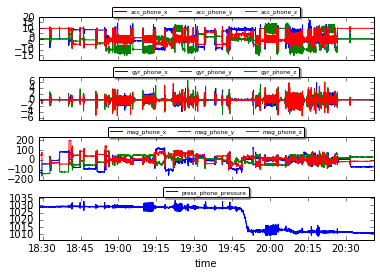

In [7]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 2                                               #
#                                                            #
##############################################################


dataset_path = '../Data/csv-participant-one/'
result_dataset_path = './intermediate_datafiles/'

# Import the relevant classes.

import copy
import os

from PythonCode.Chapter2.CreateDataset import CreateDataset
from PythonCode.util import util
from PythonCode.util.VisualizeDataset import VisualizeDataset

if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [250]
datasets = []

# ['loggingTime(txt)', 'loggingSample(N)', 'identifierForVendor(txt)', 'deviceID(txt)', 'locationTimestamp_since1970(s)', 'locationLatitude(WGS84)', 'locationLongitude(WGS84)', 'locationAltitude(m)', 'locationSpeed(m/s)', 'locationCourse(\xc2\xb0)', 'locationVerticalAccuracy(m)', 'locationHorizontalAccuracy(m)', 'locationFloor(Z)', 'locationHeadingTimestamp_since1970(s)', 'locationHeadingX(\xc2\xb5T)', 'locationHeadingY(\xc2\xb5T)', 'locationHeadingZ(\xc2\xb5T)', 'locationTrueHeading(\xc2\xb0)', 'locationMagneticHeading(\xc2\xb0)', 'locationHeadingAccuracy(\xc2\xb0)', 'accelerometerTimestamp_sinceReboot(s)', 'accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)', 'gyroTimestamp_sinceReboot(s)', 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)', 'motionTimestamp_sinceReboot(s)', 'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)', 'motionRotationRateX(rad/s)', 'motionRotationRateY(rad/s)', 'motionRotationRateZ(rad/s)', 'motionUserAccelerationX(G)', 'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)', 'motionAttitudeReferenceFrame(txt)', 'motionQuaternionX(R)', 'motionQuaternionY(R)', 'motionQuaternionZ(R)', 'motionQuaternionW(R)', 'motionGravityX(G)', 'motionGravityY(G)', 'motionGravityZ(G)', 'motionMagneticFieldX(\xc2\xb5T)', 'motionMagneticFieldY(\xc2\xb5T)', 'motionMagneticFieldZ(\xc2\xb5T)', 'motionMagneticFieldCalibrationAccuracy(Z)', 'activityTimestamp_sinceReboot(s)', 'activity(txt)', 'activityActivityConfidence(Z)', 'activityActivityStartDate(txt)', 'pedometerStartDate(txt)', 'pedometerNumberofSteps(N)', 'pedometerDistance(m)', 'pedometerFloorAscended(N)', 'pedometerFloorDescended(N)', 'pedometerEndDate(txt)', 'altimeterTimestamp_sinceReboot(s)', 'altimeterReset(bool)', 'altimeterRelativeAltitude(m)', 'altimeterPressure(kPa)', 'IP_en0(txt)', 'IP_pdp_ip0(txt)', 'deviceOrientation(Z)', 'batteryState(R)', 'batteryLevel(Z)', 'avAudioRecorderPeakPower(dB)', 'avAudioRecorderAveragePower(dB)', 'state(N)']


for milliseconds_per_instance in granularities:


    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.
    # DataSet.add_numerical_dataset('2017-06-07_11-17-35_+0200.csv', 'accelerometerTimestamp_sinceReboot(s)'
    #                               ,['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)'],'avg', 'acc_phone_')
    #
    # DataSet.add_numerical_dataset('2017-06-07_11-17-35_+0200.csv', 'gyroTimestamp_sinceReboot(s)',
    #                               ['gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)'], 'avg', 'gyr_phone_')
    #
    # DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('accelerometer_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
    # DataSet.add_numerical_dataset('accelerometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_watch_')
    #
    # # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('gyroscope_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_phone_')
    # DataSet.add_numerical_dataset('gyroscope_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_watch_')
    #
    # # We add the heart rate (continuous numerical measurements) and aggregate by averaging again
    # DataSet.add_numerical_dataset('heart_rate_smartwatch.csv', 'timestamps', ['rate'], 'avg', 'hr_watch_')
    #
    # # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # # occurs within an interval).
    # DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')
    #
    # # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    # DataSet.add_numerical_dataset('light_phone.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')
    #
    # # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('magnetometer_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_phone_')
    # DataSet.add_numerical_dataset('magnetometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_watch_')
    #
    # # We add the pressure sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('pressure_phone.csv', 'timestamps', ['pressure'], 'avg', 'press_phone_')

    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    # DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z'])
    # DataViz.plot_dataset_boxplot(dataset, ['acc_p
    # hone_accelerometerAccelerationX(G)', 'acc_phone_accelerometerAccelerationY(G)', 'acc_phone_accelerometerAccelerationZ(G)'])

    # print(dataset)
    # Plot all data
    # DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'hr_watch_rate', 'light_phone_lux', 'mag_', 'press_phone_', 'label'],
    #                      ['like', 'like', 'like', 'like', 'like', 'like', 'like','like'],
    #                      ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_',  'mag_','press_phone_',],
                         ['like', 'like', 'like', 'like', 'like'],
                         ['line', 'line', 'line', 'line', 'like'])

    # And print a summary of the dataset

    # util.print_statistics(dataset)
#     datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book

# util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
# dataset.to_csv(result_dataset_path + 'chapter2_result.csv')


In [1]:
# from pandas import scatter_matrix
# from pandas.io.parsers import read_csv
# from rpy2.robjects import r, pandas2ri
# from sklearn import preprocessing, model_selection
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
#
# from boruta import BorutaPy
# from pprint import pprint
# from matplotlib import interactive
#
#
# import matplotlib.pyplot as plt
# import rpy2.robjects as robjects
# # import pandas.rpy.common as com
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn.cluster as cluster
# import time
#
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier

import copy
import os

from PythonCode.Chapter2.CreateDataset import CreateDataset
from PythonCode.util import util
from PythonCode.util.VisualizeDataset import VisualizeDataset


In [2]:
#  data = pd.read_csv('../Data/mobile/2017-06-07_11-17-35_+0200.csv')
#
# data = data.rename(columns={'motionMagneticFieldX(\xc2\xb5T)': 'motionMagneticFieldX'})
# data = data.rename(columns={'motionMagneticFieldY(\xc2\xb5T)': 'motionMagneticFieldY'})
# data = data.rename(columns={'motionMagneticFieldZ(\xc2\xb5T)': 'motionMagneticFieldZ'})
#
# data.to_csv('../Data/mobile/2017-06-07_11-17-35_+0200.csv')
#
# exit(0)

In [3]:
### STATES
# STATE 1 = sitting
# STATE 2 = walking
print("main")

# data = pd.read_csv('../Data/mobile/2017-06-07_11-17-35_+0200.csv')
# # data = pd.read_csv('../Data/csv-participant-one/accelerometer_phone.csv',nrows = 1000)
# print(data.head())
# print(list(data))
# plt.hist(data['accelerometerAccelerationX(G)'])
# plt.hist(data['y'])
# plt.hist(data['z'])
# plt.scatter(data['y'], data['z'])
# plt.show()

# import PythonCode.Chapter2.CreateDataset
# db= PythonCode.Chapter2.CreateDataset.CreateDataset('../Data/csv-participant-one',0)



# import PythonCode.util.VisualizeDataset
# PythonCode.util.VisualizeDataset.VisualizeDataset.plot_dataset(data,'x')



main


In [ ]:

dataset_path = '../Data/mobile/'
result_dataset_path = './intermediate_datafiles/'


if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [60000, 250]
datasets = []


In [ ]:
# ['loggingTime(txt)', 'loggingSample(N)', 'identifierForVendor(txt)', 'deviceID(txt)',
# 'locationTimestamp_since1970(s)', 'locationLatitude(WGS84)', 'locationLongitude(WGS84)', 'locationAltitude(m)',
# 'locationSpeed(m/s)', 'locationCourse(\xc2\xb0)', 'locationVerticalAccuracy(m)', 'locationHorizontalAccuracy(m)', 'locationFloor(Z)',
# 'locationHeadingTimestamp_since1970(s)', 'locationHeadingX(\xc2\xb5T)', 'locationHeadingY(\xc2\xb5T)', 'locationHeadingZ(\xc2\xb5T)',
# 'locationTrueHeading(\xc2\xb0)', 'locationMagneticHeading(\xc2\xb0)', 'locationHeadingAccuracy(\xc2\xb0)',
# 'accelerometerTimestamp_sinceReboot(s)', 'accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)',
# 'gyroTimestamp_sinceReboot(s)', 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',
# 'motionTimestamp_sinceReboot(s)', 'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)',
# 'motionRotationRateX(rad/s)', 'motionRotationRateY(rad/s)', 'motionRotationRateZ(rad/s)',
# 'motionUserAccelerationX(G)', 'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)',
# 'motionAttitudeReferenceFrame(txt)', 'motionQuaternionX(R)', 'motionQuaternionY(R)', 'motionQuaternionZ(R)',
# 'motionQuaternionW(R)', 'motionGravityX(G)', 'motionGravityY(G)', 'motionGravityZ(G)',
# 'motionMagneticFieldX(\xc2\xb5T)', 'motionMagneticFieldY(\xc2\xb5T)', 'motionMagneticFieldZ(\xc2\xb5T)',
# 'motionMagneticFieldCalibrationAccuracy(Z)', 'activityTimestamp_sinceReboot(s)',
# 'activity(txt)', 'activityActivityConfidence(Z)', 'activityActivityStartDate(txt)',
# 'pedometerStartDate(txt)', 'pedometerNumberofSteps(N)', 'pedometerDistance(m)',
# 'pedometerFloorAscended(N)', 'pedometerFloorDescended(N)', 'pedometerEndDate(txt)',
# 'altimeterTimestamp_sinceReboot(s)', 'altimeterReset(bool)', 'altimeterRelativeAltitude(m)', 'altimeterPressure(kPa)',
# 'IP_en0(txt)', 'IP_pdp_ip0(txt)', 'deviceOrientation(Z)', 'batteryState(R)', 'batteryLevel(Z)',
# 'avAudioRecorderPeakPower(dB)', 'avAudioRecorderAveragePower(dB)', 'state(N)']



In [2]:


for milliseconds_per_instance in granularities:
    print (milliseconds_per_instance)
    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.
    DataSet.add_numerical_dataset('2017-06-07_11-17-35_+0200.csv', 'loggingTime(txt)',
                                  ['accelerometerAccelerationX(G)', 'accelerometerAccelerationY(G)', 'accelerometerAccelerationZ(G)'],
                                  'avg', 'acc_phone_')

    DataSet.add_numerical_dataset('2017-06-07_11-17-35_+0200.csv', 'loggingTime(txt)',
                                  ['gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)'],
                                  'avg',
                                  'gyr_phone_')

    # DataSet.add_event_dataset('2017-06-07_11-17-35_+0200.csv', 'label_start', 'label_end', 'label', 'binary')

    DataSet.add_numerical_dataset('2017-06-07_11-17-35_+0200.csv', 'loggingTime(txt)',
                                  ['motionMagneticFieldX(\\xc2\\xb5T)', 'motionMagneticFieldY(\\xc2\\xb5T)', 'motionMagneticFieldZ(\\xc2\\xb5T)'], 'avg', 'mag_phone_')


    DataSet.add_numerical_dataset('2017-06-07_11-17-35_+0200.csv',
                                  'loggingTime(txt)', ['altimeterPressure(kPa)'],
                                  'avg', 'press_phone_')

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    # DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z'])
    # DataViz.plot_dataset_boxplot(dataset, ['acc_phone_accelerometerAccelerationX(G)', 'acc_phone_accelerometerAccelerationY(G)', 'acc_phone_accelerometerAccelerationZ(G)'])

    # print(dataset)
    # Plot all data
    # DataViz.plot_dataset(dataset,
    # ['acc_', 'gyr_', 'hr_watch_rate', 'light_phone_lux', 'mag_', 'press_phone_', 'label'],
    # ['like', 'like', 'like', 'like', 'like', 'like', 'like','like'],
    # ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'mag_', 'press_phone_'],
                         ['like', 'like', 'like', 'like', 'like'],
                         ['line', 'line', 'line', 'line', 'like'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book

util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result.csv')

main
60000


KeyError: 'motionMagneticFieldX(\\xc2\\xb5T)'